**Aula 5: Previsão de Séries Temporais de Ações**

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# Dataframe das acoes da Johnson & Johnson
dados = yf.download("JNJ", start='2020-01-01', end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099106,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592819,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432449,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216766,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198914,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [3]:
# Dividindo em dois Dataframes
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [4]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date' : 'ds', 'Close' : 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [5]:
# Criaçao do modelo de previsão 
modelo = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)
modelo.add_country_holidays(country_name='US')
modelo.fit(dados_prophet_treino)

12:18:19 - cmdstanpy - INFO - Chain [1] start processing
12:18:19 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Criação de datas futuras para previsão
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.375915,145.293230,155.485189,146.375915,146.375915,0.0,0.0,0.0,0.0,...,0.327372,0.327372,0.327372,4.070330,4.070330,4.070330,0.0,0.0,0.0,150.773617
1,2020-01-03,146.352650,145.572350,156.026729,146.352650,146.352650,0.0,0.0,0.0,0.0,...,0.464548,0.464548,0.464548,3.860316,3.860316,3.860316,0.0,0.0,0.0,150.677513
2,2020-01-06,146.282854,144.245397,154.470359,146.282854,146.282854,0.0,0.0,0.0,0.0,...,0.063913,0.063913,0.063913,3.190086,3.190086,3.190086,0.0,0.0,0.0,149.536853
3,2020-01-07,146.259589,144.180393,154.547224,146.259589,146.259589,0.0,0.0,0.0,0.0,...,0.234260,0.234260,0.234260,2.967958,2.967958,2.967958,0.0,0.0,0.0,149.461807
4,2020-01-08,146.236323,143.923215,154.290510,146.236323,146.236323,0.0,0.0,0.0,0.0,...,0.378460,0.378460,0.378460,2.753546,2.753546,2.753546,0.0,0.0,0.0,149.368329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.866780,144.409983,166.234113,141.008838,160.004302,0.0,0.0,0.0,0.0,...,0.327372,0.327372,0.327372,4.664092,4.664092,4.664092,0.0,0.0,0.0,154.858244
1045,2023-12-22,149.814499,144.274497,166.710998,140.941221,160.066558,0.0,0.0,0.0,0.0,...,0.464548,0.464548,0.464548,4.785073,4.785073,4.785073,0.0,0.0,0.0,155.064119
1046,2023-12-23,149.762218,143.347282,165.542456,140.820518,160.097846,0.0,0.0,0.0,0.0,...,-0.734276,-0.734276,-0.734276,4.875358,4.875358,4.875358,0.0,0.0,0.0,153.903300
1047,2023-12-24,149.709937,143.591347,165.795448,140.584518,160.118897,0.0,0.0,0.0,0.0,...,-0.734277,-0.734277,-0.734277,4.933439,4.933439,4.933439,0.0,0.0,0.0,153.909100


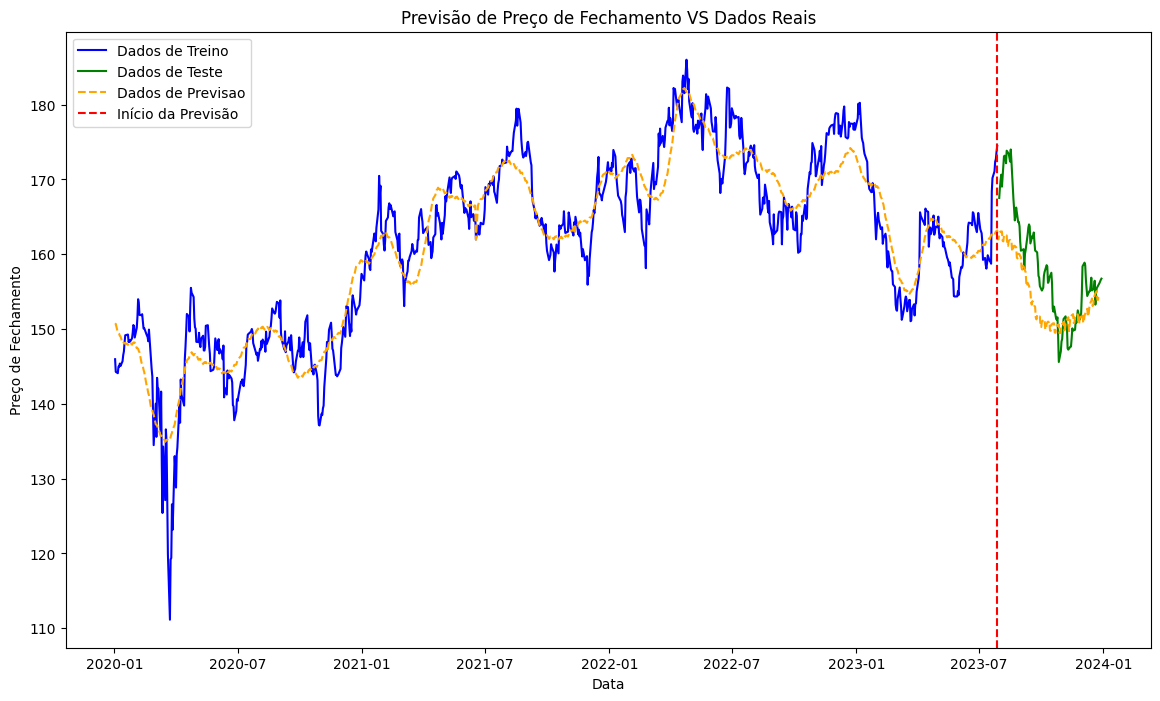

In [7]:
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados de Teste', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Dados de Previsao', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento VS Dados Reais')

plt.legend()
plt.show()